In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys,os

sys.path.append("./repos_commit/scriptsdu")
sys.path.append("./bin")
import re
from utilsdu import return_fullpars_polcycle,get_score_up_down_v2, score
import bPcycle_1bs_3states_rev1_TFA_prec50 as state3_rev1
import bPcycle_1bs_3states_rev2_TFA_prec50 as state3_rev2
import bPcycle_1bs_3states_rev1u2_TFA_prec50 as state3_rev12
import bPcycle_1bs_5states_rev1u2u3u4_TFA_prec50 as state5_rev1234
from functools import partial

mypat=re.compile("model=([0-9]_[0-9]+)_t=(.*)_d=(.*)")
model="model=5_1234_t=1f,2f_d=p_m"
mypat.findall(model)

[('5_1234', '1f,2f', 'p_m')]

In [2]:
models=['model=3_1_t=1f,2f_d=m_p', 'model=3_1_t=1r,2f_d=p_p', 'model=3_1_t=1r,2f_d=m_m', 'model=3_1_t=1r,3f_d=p_p', 'model=3_1_t=1r,3f_d=m_m', 'model=3_2_t=1f,2f_d=p_m', 'model=3_2_t=1f,2f_d=m_p', 'model=3_2_t=1f,2r_d=p_p', 'model=3_2_t=1f,2r_d=m_m', 'model=3_2_t=1f,3f_d=m_p', 'model=3_2_t=1f,3f_d=p_m', 'model=3_12_t=1f,2f_d=p_m', 'model=3_12_t=1f,2f_d=m_p', 'model=3_12_t=1f,3f_d=p_m', 'model=3_12_t=1f,3f_d=m_p', 'model=5_1234_t=1f,2f_d=p_m', 'model=5_1234_t=2f,4f_d=m_p']
for model in models:
    model, s_r_t,T,d=model.split("=")
    s,r,t=s_r_t.split("_")
    newstr="$model="+s+"\_\{"+",".join(list(r))+"\}\_"+t+"="
    t1,t2=T.split(",")
    t2=t2.replace("_d","")
    t1=t1.replace("f","_f").replace("r","_r")
    t2=t2.replace("f","_f").replace("r","_r")
    newstr+="\{%s,%s\}\_d=%s$"%(t1,t2,d.replace("_",","))
    print("\item",newstr)
    #print(model,s_r_t,T,d)


\item $model=3\_\{1\}\_t=\{1_f,2_f\}\_d=m,p$
\item $model=3\_\{1\}\_t=\{1_r,2_f\}\_d=p,p$
\item $model=3\_\{1\}\_t=\{1_r,2_f\}\_d=m,m$
\item $model=3\_\{1\}\_t=\{1_r,3_f\}\_d=p,p$
\item $model=3\_\{1\}\_t=\{1_r,3_f\}\_d=m,m$
\item $model=3\_\{2\}\_t=\{1_f,2_f\}\_d=p,m$
\item $model=3\_\{2\}\_t=\{1_f,2_f\}\_d=m,p$
\item $model=3\_\{2\}\_t=\{1_f,2_r\}\_d=p,p$
\item $model=3\_\{2\}\_t=\{1_f,2_r\}\_d=m,m$
\item $model=3\_\{2\}\_t=\{1_f,3_f\}\_d=m,p$
\item $model=3\_\{2\}\_t=\{1_f,3_f\}\_d=p,m$
\item $model=3\_\{1,2\}\_t=\{1_f,2_f\}\_d=p,m$
\item $model=3\_\{1,2\}\_t=\{1_f,2_f\}\_d=m,p$
\item $model=3\_\{1,2\}\_t=\{1_f,3_f\}\_d=p,m$
\item $model=3\_\{1,2\}\_t=\{1_f,3_f\}\_d=m,p$
\item $model=5\_\{1,2,3,4\}\_t=\{1_f,2_f\}\_d=p,m$
\item $model=5\_\{1,2,3,4\}\_t=\{2_f,4_f\}\_d=m,p$


0 model=3_1_t=1r,2f_d=p_p
1 model=3_1_t=1r,2f_d=m_m
2 model=3_1_t=1f,2f_d=m_p
3 model=3_1_t=1r,3f_d=p_p
4 model=3_1_t=1r,3f_d=m_m
6 model=3_2_t=1f,2f_d=p_m
7 model=3_2_t=1f,2f_d=m_p
8 model=3_2_t=1f,2r_d=p_p
9 model=3_2_t=1f,2r_d=m_m
10 model=3_2_t=1f,3f_d=m_p
11 model=3_2_t=1f,3f_d=p_m
12 model=3_12_t=1f,2f_d=p_m
13 model=3_12_t=1f,2f_d=m_p
14 model=3_12_t=1f,3f_d=p_m
15 model=3_12_t=1f,3f_d=m_p
18 model=5_1234_t=1f,2f_d=p_m
19 model=5_1234_t=2f,4f_d=m_p


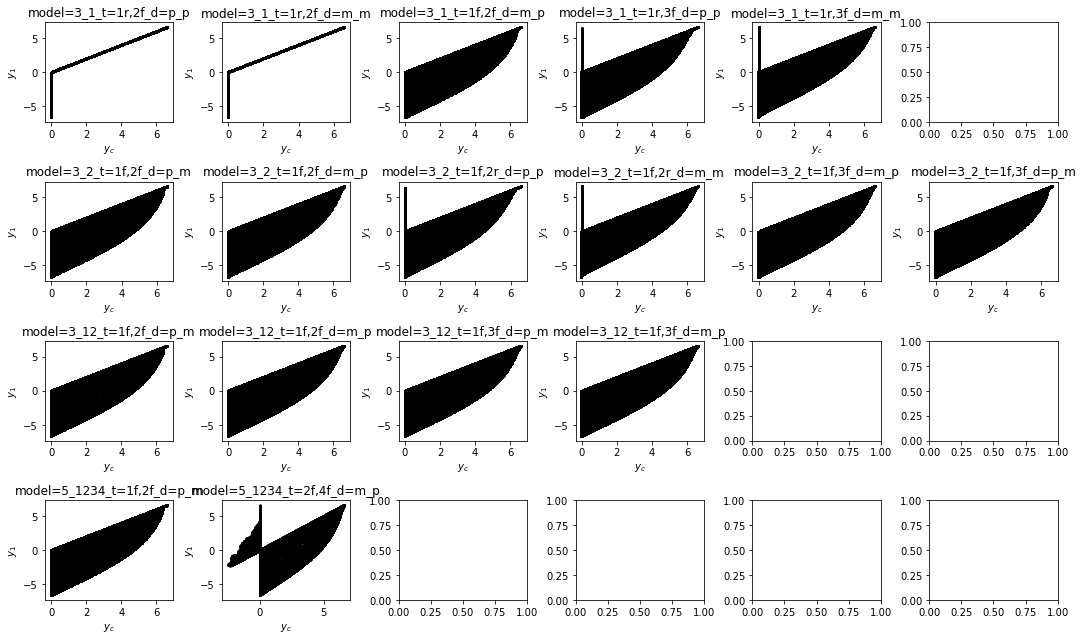

In [3]:
models=['model=3_1_t=1r,2f_d=p_p', 'model=3_1_t=1r,2f_d=m_m','model=3_1_t=1f,2f_d=m_p',  'model=3_1_t=1r,3f_d=p_p', 'model=3_1_t=1r,3f_d=m_m', "",
        'model=3_2_t=1f,2f_d=p_m', 'model=3_2_t=1f,2f_d=m_p', 'model=3_2_t=1f,2r_d=p_p', 'model=3_2_t=1f,2r_d=m_m', 'model=3_2_t=1f,3f_d=m_p', 'model=3_2_t=1f,3f_d=p_m', 
        'model=3_12_t=1f,2f_d=p_m', 'model=3_12_t=1f,2f_d=m_p', 'model=3_12_t=1f,3f_d=p_m', 'model=3_12_t=1f,3f_d=m_p', "","",
        'model=5_1234_t=1f,2f_d=p_m', 'model=5_1234_t=2f,4f_d=m_p']

folder="./clustersearch/dfs_polcyclemodels"
fig,axes=plt.subplots(4,6,figsize=(15,9))

for c_,case in enumerate(models):
    if case!="":

        print(c_,case)
        df=pd.read_csv(os.path.join(folder,case+".csv"))

        if df is None:
            print("None for model", case)
            parset1=[]
            parset2=[]
            parset3=[]
            parset4=[]
        else:
            x=df["col"].values
            y=df["row"].values
            ax=axes[c_//6][c_%6]
            ax.scatter(x,y,color="k",s=2)
            ax.set_title(case)
            ax.set_xlabel("$y_c$")
            ax.set_ylabel("$y_1$")
plt.tight_layout()
plt.show()
        

0 model=3_1_t=1r,2f_d=p_p
reverse
[5125 3459 3496 6195 4657]
diag q1 y_c: 2.774999999999979 y_1: 2.7750000000002544 ; [2.799761849519625, 2.799761849519625]
parset_0_5125=[202.411394,93.8847216,2447.52471,1.0,59.5393844,3355.48374,1.48991782,9.34292859]
[('kb', 202.411394), ('k_1_0', 2447.52471), ('kr_1_0', 3355.48374), ('kb', 202.411394), ('k_2_0', 1.0), ('kb', 202.411394), ('k_3_0', 59.5393844), ('ku', 93.8847216), ('k_1_1', 2447.52471), ('kr_1_1', 4999.395018946248), ('ku', 93.8847216), ('k_2_1', 9.34292859), ('ku', 93.8847216), ('k_3_1', 59.5393844)]

diag q1 y_c: 0.7249999999999868 y_1: 0.7250000000002235 ; [0.7454650782153772, 0.7454650782153772]
parset_0_3459=[1389.14868,10.0306654,1.0,2.90647492,10000.0,1.0,1.000001,100.0]
[('kb', 1389.14868), ('k_1_0', 1.0), ('kr_1_0', 1.0), ('kb', 1389.14868), ('k_2_0', 2.90647492), ('kb', 1389.14868), ('k_3_0', 10000.0), ('ku', 10.0306654), ('k_1_1', 1.0), ('kr_1_1', 1.000001), ('ku', 10.0306654), ('k_2_1', 290.647492), ('ku', 10.0306654), (

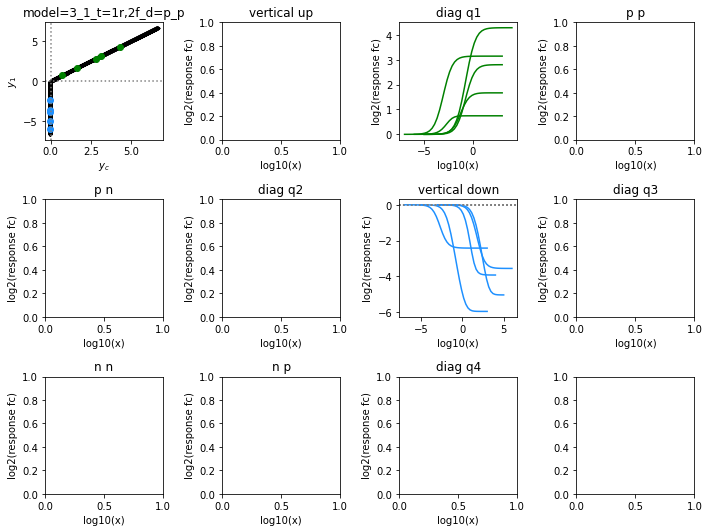

1 model=3_1_t=1r,2f_d=m_m
reverse
[3050 2949 2935 3453 3628]
diag q1 y_c: 3.824999999999976 y_1: 3.8250000000002657 ; [3.8296339451217896, 3.8296339451217896]
parset_1_3050=[10000.0,1.0,1.0,496.272784,10.1739488,10000.0,0.0195693241,0.999999]
[('kb', 10000.0), ('k_1_0', 1.0), ('kr_1_0', 10000.0), ('kb', 10000.0), ('k_2_0', 496.272784), ('kb', 10000.0), ('k_3_0', 10.1739488), ('ku', 1.0), ('k_1_1', 1.0), ('kr_1_1', 195.693241), ('ku', 1.0), ('k_2_1', 496.272287727216), ('ku', 1.0), ('k_3_1', 10.1739488)]

diag q1 y_c: 1.2999999999999847 y_1: 1.3000000000002316 ; [1.3155162802330183, 1.3155162802330183]
parset_1_2949=[4.27839581,1.0,5.36198362,480.111538,92.075333,786.027935,0.01,0.95359422]
[('kb', 4.27839581), ('k_1_0', 5.36198362), ('kr_1_0', 786.027935), ('kb', 4.27839581), ('k_2_0', 480.111538), ('kb', 4.27839581), ('k_3_0', 92.075333), ('ku', 1.0), ('k_1_1', 5.36198362), ('kr_1_1', 7.86027935), ('ku', 1.0), ('k_2_1', 457.8315875921104), ('ku', 1.0), ('k_3_1', 92.075333)]

diag q1 y

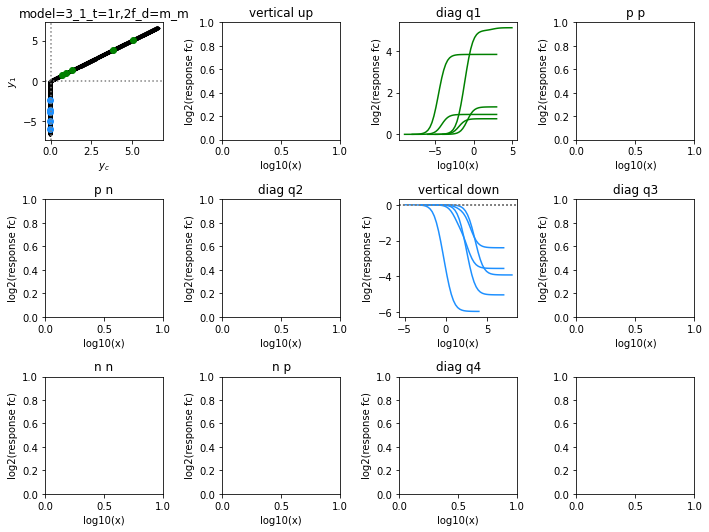

2 model=3_1_t=1f,2f_d=m_p
[31694 10650 48810  9932 35968]
diag q1 y_c: 6.424999999999967 y_1: 6.425000000000303 ; [6.43936164455051, 6.43936164455051]
parset_2_31694=[1.0,1.0,10000.0,1.0,5311.88372,23.5445764,0.0905311415,100.0]
[('kb', 1.0), ('k_1_0', 10000.0), ('kr_1_0', 23.5445764), ('kb', 1.0), ('k_2_0', 1.0), ('kb', 1.0), ('k_3_0', 5311.88372), ('ku', 1.0), ('k_1_1', 905.3114149999999), ('kr_1_1', 23.5445764), ('ku', 1.0), ('k_2_1', 100.0), ('ku', 1.0), ('k_3_1', 5311.88372)]

diag q1 y_c: 2.0749999999999815 y_1: 2.0750000000002444 ; [2.0790479991502404, 2.0790479991502404]
parset_2_10650=[1.0,7760.57843,1.0,1.0,10000.0,2.36905575,0.999999,100.0]
[('kb', 1.0), ('k_1_0', 1.0), ('kr_1_0', 2.36905575), ('kb', 1.0), ('k_2_0', 1.0), ('kb', 1.0), ('k_3_0', 10000.0), ('ku', 7760.57843), ('k_1_1', 0.999999), ('kr_1_1', 2.36905575), ('ku', 7760.57843), ('k_2_1', 100.0), ('ku', 7760.57843), ('k_3_1', 10000.0)]

diag q1 y_c: 5.1749999999999705 y_1: 5.1750000000002885 ; [5.188982827238168, 5.

diag q2 y_c: 1.1249999999999858 y_1: -1.1499999999998032 ; [1.1379743750346567, -1.1293873917484025]
parset_2_25399=[658.75556,201.356186,356.515235,36.0002564,338.957847,10.6706116,0.0391127664,94.6185087]
[('kb', 658.75556), ('k_1_0', 356.515235), ('kr_1_0', 10.6706116), ('kb', 658.75556), ('k_2_0', 36.0002564), ('kb', 658.75556), ('k_3_0', 338.957847), ('ku', 201.356186), ('k_1_1', 13.944297104596105), ('kr_1_1', 10.6706116), ('ku', 201.356186), ('k_2_1', 3406.2905733856305), ('ku', 201.356186), ('k_3_1', 338.957847)]

diag q2 y_c: 1.7749999999999826 y_1: -1.7999999999998124 ; [1.7774040889569116, -1.779062179920569]
parset_2_1258=[1.0,3752.04992,10000.0,370.597022,6066.00065,210.22183,0.01,41.1565235]
[('kb', 1.0), ('k_1_0', 10000.0), ('kr_1_0', 210.22183), ('kb', 1.0), ('k_2_0', 370.597022), ('kb', 1.0), ('k_3_0', 6066.00065), ('ku', 3752.04992), ('k_1_1', 100.0), ('kr_1_1', 210.22183), ('ku', 3752.04992), ('k_2_1', 15252.485044973017), ('ku', 3752.04992), ('k_3_1', 6066.00065)]



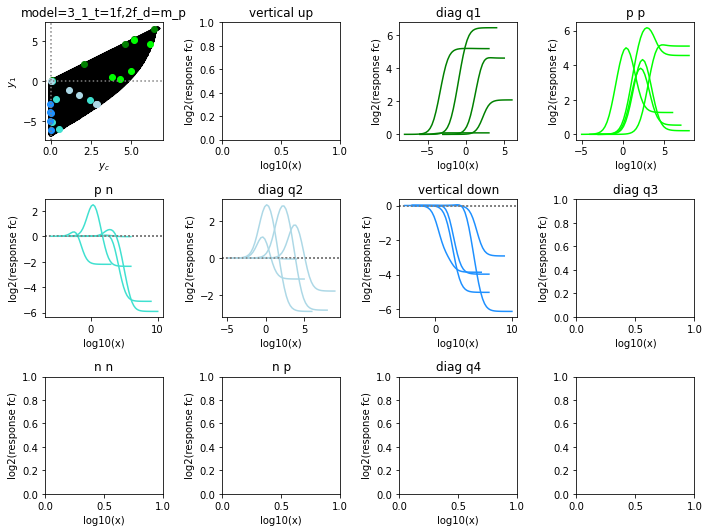

3 model=3_1_t=1r,3f_d=p_p
reverse
[ 3057 37316 41761 55281 19954]
vertical up y_c: -1.0658141036401504e-14 y_1: 0.200000000000216 ; [0, 0.21485523292787884]
parset_3_3057=[3.32821085,557.194844,10000.0,7657.201,1.0,10000.0,100.0,1.17852371]
[('kb', 3.32821085), ('k_1_0', 10000.0), ('kr_1_0', 10000.0), ('kb', 3.32821085), ('k_2_0', 7657.201), ('kb', 3.32821085), ('k_3_0', 1.0), ('ku', 557.194844), ('k_1_1', 10000.0), ('kr_1_1', 1000000.0), ('ku', 557.194844), ('k_2_1', 7657.201), ('ku', 557.194844), ('k_3_1', 1.17852371)]

vertical up y_c: -1.0658141036401504e-14 y_1: 3.3500000000002608 ; [0, 3.3703712676078146]
parset_3_37316=[1.0,10000.0,6621.68696,1666.94719,1.0,3697.2695,100.0,15.9918362]
[('kb', 1.0), ('k_1_0', 6621.68696), ('kr_1_0', 3697.2695), ('kb', 1.0), ('k_2_0', 1666.94719), ('kb', 1.0), ('k_3_0', 1.0), ('ku', 10000.0), ('k_1_1', 6621.68696), ('kr_1_1', 369726.95), ('ku', 10000.0), ('k_2_1', 1666.94719), ('ku', 10000.0), ('k_3_1', 15.9918362)]

vertical up y_c: -1.0658141036

diag q2 y_c: 0.0999999999999889 y_1: -0.0999999999997882 ; [0.10388094378099633, -0.08376288268903621]
parset_3_40690=[1805.73477,15.5084158,115.613389,930.958916,1.0,1856.90717,15.6540275,1.23674559]
[('kb', 1805.73477), ('k_1_0', 115.613389), ('kr_1_0', 1856.90717), ('kb', 1805.73477), ('k_2_0', 930.958916), ('kb', 1805.73477), ('k_3_0', 1.0), ('ku', 15.5084158), ('k_1_1', 115.613389), ('kr_1_1', 29068.075904127174), ('ku', 15.5084158), ('k_2_1', 930.958916), ('ku', 15.5084158), ('k_3_1', 1.23674559)]

diag q2 y_c: 2.72499999999998 y_1: -2.7249999999998256 ; [2.7279011236207507, -2.7001191892704828]
parset_3_7284=[1.0,1646.35212,2077.06439,148.984871,2.17635048,10000.0,100.0,100.0]
[('kb', 1.0), ('k_1_0', 2077.06439), ('kr_1_0', 10000.0), ('kb', 1.0), ('k_2_0', 148.984871), ('kb', 1.0), ('k_3_0', 2.17635048), ('ku', 1646.35212), ('k_1_1', 2077.06439), ('kr_1_1', 1000000.0), ('ku', 1646.35212), ('k_2_1', 148.984871), ('ku', 1646.35212), ('k_3_1', 217.63504799999998)]

diag q2 y_c: 0.5

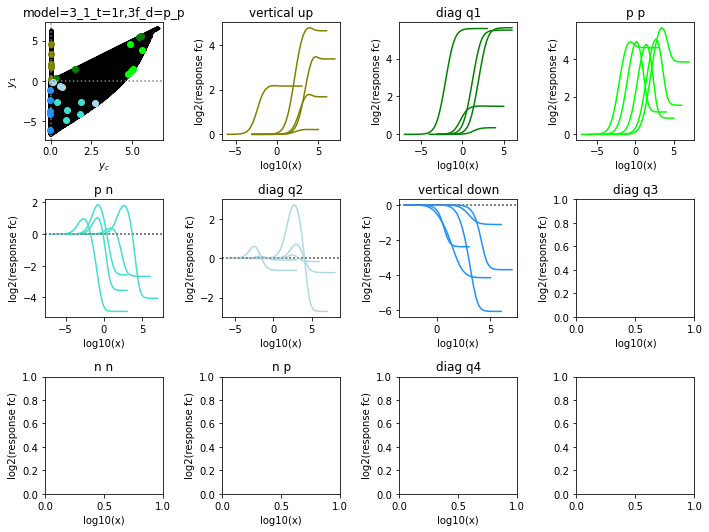

4 model=3_1_t=1r,3f_d=m_m
reverse
[13919 54322 48386 26085  3131]
vertical up y_c: -1.0658141036401504e-14 y_1: 0.3250000000002178 ; [0, 0.3462176062112976]
parset_4_13919=[4400.82332,408.778147,443.780297,32.0935726,1.51986026,4306.22563,0.0120421444,0.883599893]
[('kb', 4400.82332), ('k_1_0', 443.780297), ('kr_1_0', 4306.22563), ('kb', 4400.82332), ('k_2_0', 32.0935726), ('kb', 4400.82332), ('k_3_0', 1.51986026), ('ku', 408.778147), ('k_1_1', 443.780297), ('kr_1_1', 51.85619085544097), ('ku', 408.778147), ('k_2_1', 32.0935726), ('ku', 408.778147), ('k_3_1', 1.342948363110952)]

vertical up y_c: -1.0658141036401504e-14 y_1: 2.9000000000002544 ; [0, 2.9175905118272443]
parset_4_54322=[1.0,18.0360087,19.4717598,16.0442537,1.0,10000.0,0.01,0.253188702]
[('kb', 1.0), ('k_1_0', 19.4717598), ('kr_1_0', 10000.0), ('kb', 1.0), ('k_2_0', 16.0442537), ('kb', 1.0), ('k_3_0', 1.0), ('ku', 18.0360087), ('k_1_1', 19.4717598), ('kr_1_1', 100.0), ('ku', 18.0360087), ('k_2_1', 16.0442537), ('ku', 18.0

diag q2 y_c: 1.5999999999999837 y_1: -1.62499999999981 ; [1.6192411498722108, -1.6189839015530838]
parset_4_34516=[2.15697666,571.715863,1582.14384,1.0,4.52311927,10000.0,0.01,0.01]
[('kb', 2.15697666), ('k_1_0', 1582.14384), ('kr_1_0', 10000.0), ('kb', 2.15697666), ('k_2_0', 1.0), ('kb', 2.15697666), ('k_3_0', 4.52311927), ('ku', 571.715863), ('k_1_1', 1582.14384), ('kr_1_1', 100.0), ('ku', 571.715863), ('k_2_1', 1.0), ('ku', 571.715863), ('k_3_1', 0.0452311927)]

diag q2 y_c: 1.0499999999999856 y_1: -1.074999999999802 ; [1.055919711247634, -1.0644386614426333]
parset_4_63205=[297.502485,46.9400568,35.8023932,13.9538983,1.85450322,1047.54473,0.01,0.0962653355]
[('kb', 297.502485), ('k_1_0', 35.8023932), ('kr_1_0', 1047.54473), ('kb', 297.502485), ('k_2_0', 13.9538983), ('kb', 297.502485), ('k_3_0', 1.85450322), ('ku', 46.9400568), ('k_1_1', 35.8023932), ('kr_1_1', 10.4754473), ('ku', 46.9400568), ('k_2_1', 13.9538983), ('ku', 46.9400568), ('k_3_1', 0.1785243746591303)]

diag q2 y_c: 1

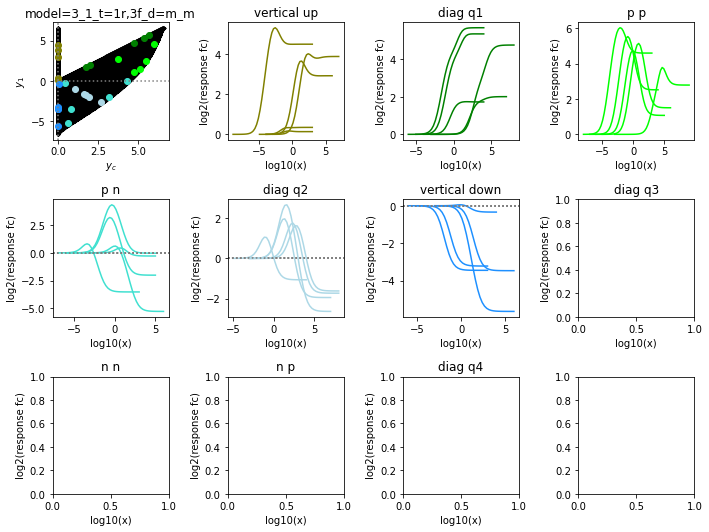

5 


FileNotFoundError: [Errno 2] No such file or directory: './clustersearch/dfs_polcyclemodels/.csv'

In [5]:
#plot a few functions per model around relevant coordinates:

colors=["olive","green","lime","turquoise","lightblue","dodgerblue","blue","magenta","red","orange"]
kwargs=dict(tol=1e-5,check_out0=False,out0_tol=0.001,fc_tol=0.070389327891398)#used in the run

i_=1
if True:
    #if i_==0: look only at the vertical up, in detail, otherwise look at all
    for c_,case in enumerate(models):

        print(c_,case)
        df=pd.read_csv(os.path.join(folder,case+".csv"))

        if df is None:
            print("None for model", case)
            parset1=[]
            parset2=[]
            parset3=[]
            parset4=[]
        else:
            x=df["col"].values
            y=df["row"].values
            model,transitions,direction=mypat.findall(case)[0]
            if "r" in transitions:
                print("reverse")
            transitions=transitions.split(",")
            return_fullpars=partial(return_fullpars_polcycle,model=model,transitions=transitions)

            if model=="3_1":
                ccode=state3_rev1
            elif model=="3_2":
                ccode=state3_rev2
            elif model=="3_12":
                ccode=state3_rev12
            elif model=="5_1":
                ccode=state5_rev1
            elif model=="5_1234":
                ccode=state5_rev1234
            else:
                print("model not understood")
                raise(ValueError)
            ssfunc=ccode.interfacess

            x_0=np.where((x>(0-0.03))&(x<(0+0.03)))[0]
            x_positive=np.where(x>0.03)[0]
            x_negative=np.where(x<-0.03)[0]
            y_positive=np.where(y>0.03)[0]
            y_negative=np.where(y<-0.03)[0]
            all_positive=np.intersect1d(x_positive,y_positive)
            all_negative=np.intersect1d(x_negative,y_negative)
            xp_yn=np.intersect1d(x_positive,y_negative)
            xn_yp=np.intersect1d(x_negative,y_positive)
            diagonal=np.where(np.abs(x-y)<0.025)[0] #y=x 
            inverse_diagonal=np.where(np.abs(x-(-y))<0.025)[0] #y=-x

            idxs_up=np.intersect1d(x_0,y_positive) #vertical up
            idxs_down=np.intersect1d(x_0,y_negative)#vertical down
            idxs_diag_q1=np.intersect1d(diagonal,y_positive) 
            idxs_diag_q1=np.intersect1d(idxs_diag_q1,x_positive) #diagonal up-right, x positive
            idxs_diag_q2=np.intersect1d(inverse_diagonal,y_negative) 
            idxs_diag_q3=np.intersect1d(diagonal,y_negative)
            idxs_diag_q4=np.intersect1d(inverse_diagonal,y_positive)
            
            idxs_p_p=np.setdiff1d(all_positive,idxs_diag_q1)
            idxs_p_n=np.setdiff1d(xp_yn,idxs_diag_q2)
            idxs_n_n=np.setdiff1d(all_negative,idxs_diag_q3)
            idxs_n_p=np.setdiff1d(xn_yp,idxs_diag_q4)

            #clockwise
            if i_==0:
                idxs_groups=[idxs_up]
                names=["vertical up"]
            else:
                idxs_groups=[idxs_up,idxs_diag_q1,idxs_p_p,idxs_p_n,idxs_diag_q2,idxs_down,idxs_diag_q3,idxs_n_n,idxs_n_p,idxs_diag_q4]
                names=["vertical up","diag q1", "p p", "p n", "diag q2", "vertical down", "diag q3", "n n", "n p", "diag q4"]
            
            ncol=4
            nrow=int(np.ceil(len(idxs_groups)/ncol))
            fig,axes=plt.subplots(nrow,ncol,figsize=(10,2.5*nrow))
            if i_==0:
                ax0=axes[0]
            else:
                ax0=axes[0][0]
            ax0.scatter(x,y,color="k",s=5)
            ax0.set_title(case)
            ax0.set_xlabel("$y_c$")
            ax0.set_ylabel("$y_1$")
            ax0.axhline(y=0,linestyle=":",color="gray")
            ax0.axvline(x=0,linestyle=":",color="gray")

            for g in range(len(idxs_groups)):
                group=idxs_groups[g]
                name=names[g]
                #
                if i_==0:
                    axg=axes[g+1]
                else:
                    axg=axes[(g+1)//4][(g+1)%4]
                axg.set_title(name)
                axg.set_xlabel("log10(x)")
                axg.set_ylabel("log2(response fc)")
                if len(group)>0:
                    np.random.seed(1)
                    choice=np.random.choice(group,replace=False,size=5)
                    print(choice)
                    for idx in choice:
                        df_row=df.iloc[idx]
                        col=df_row["col"]
                        row=df_row["row"]
                        
                        parset=df_row["parameters"] #it was saved as a string so need to convert back to array
                        parset=np.array(parset.replace("\n","").replace("[","").replace("]","").split(),dtype=float)
                        
                        ax0.scatter(col,row,color=colors[g])

                        score_,f,Amin,Amax,n=score(parset,return_fullpars=return_fullpars, ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,log2out=True,returnout=True,**kwargs)
                        
                        print(name,"y_c:",col,"y_1:",row,";", score_)
                        print("parset_%d_%d=[%s]"%(c_,idx,",".join(map(str,parset))))
                        fullpars=return_fullpars(parset,verbose=True)
                        print("")
                            
                        Avals=np.logspace(np.log10(Amin),np.log10(Amax),n)
                        axg.plot(np.log10(Avals),f,color=colors[g])
                        if np.any(f<0):
                            axg.axhline(y=0,color="gray",linestyle=":")
        plt.tight_layout()
        plt.show()


From functions above, choose a few to plot:

models to plot:

$model=3\_\{1\}\_t=\{1_f,2_f\}\_d=m,p$

$model=3\_\{1\}\_t=\{1_r,3_f\}\_d=p,p$

$model=3\_\{1,2\}\_t=\{1_f,3_f\}\_d=p,m$

$model=5\_\{1,2,3,4\}\_t=\{2_f,4_f\}\_d=m,p$

In [4]:
def plot_parset(case,parset,title=None,ax=None,color="k",figname=None,show=True,xlim0=None,xlim1=None):
    kwargs=dict(tol=1e-5,check_out0=False,out0_tol=0.001,fc_tol=0.070389327891398)#used in the run
    model,transitions,direction=mypat.findall(case)[0]
    
    if model=="3_1":
        ccode=state3_rev1
        nstates=3
        nrev=[1]
    elif model=="3_2":
        ccode=state3_rev2
        nstates=3
        nrev=[2]
    elif model=="3_12":
        ccode=state3_rev12
        nstates=3
        nrev=[1,2]
    elif model=="5_1":
        ccode=state5_rev1
        nstates=5
        nrev=[1]
    elif model=="5_1234":
        ccode=state5_rev1234
        nstates=5
        nrev=[1,2,3,4]
    else:
        print("model not understood")
        raise(ValueError)
    ssfunc=ccode.interfacess
    
    
    transitions=transitions.split(",")
    print("model:",model, "transitions:", transitions)
    return_fullpars=partial(return_fullpars_polcycle,model=model,transitions=transitions)
    score_,f,Amin,Amax,n=score(parset,return_fullpars=return_fullpars, ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,n_per_om=10,log2out=True,returnout=True,**kwargs)
                        
    fullpars,names_pars=return_fullpars(parset,verbose=True, return_parnames=True)
    
    for i in range(1,nstates+1):
        #forward transitions
        #unbound transitions
        name="k_%d_0"%i

        idx=names_pars.index(name)
        value_unbound=fullpars[idx]
        newname="$k_{%s}$"%(i)
        print("%s = %2.2f"%(newname,value_unbound),end=", ")
        
        #bound transition
        name="k_%d_1"%i
        idx=names_pars.index(name)
        value_bound=fullpars[idx]
        epsilon=value_bound/value_unbound
        print("\epsilon_%d = %2.2f"%(i,epsilon),end=", ")
        
        
        if i in nrev:
            #reverse transitions
            #unbound
            
            name="kr_%d_0"%i        
            idx=names_pars.index(name)
            value_unbound=fullpars[idx]  
            newname="$k_{%s_{r}}$"%(i)
            print("%s = %2.2f"%(newname,value_unbound),end=", ")
            
            #bound
            name="kr_%d_1"%i  
            idx=names_pars.index(name)
            value_bound=fullpars[idx] 
            epsilon=value_bound/value_unbound
            print("\epsilon_{%d_r} = %2.2f"%(i,epsilon),end=", ")
            
            
                
            
    newname="$k_b$"   
    value=fullpars[names_pars.index("kb")]
    print("%s = %2.2f"%(newname,value),end=", ")
    newname="$k_u$"
    value=fullpars[names_pars.index("ku")]
    print("%s = %2.2f"%(newname,value),end=", ")
        

    Avals=np.logspace(np.log10(Amin),np.log10(Amax),n)
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(3,2.5))
        show=True
    else:
        show=False
    ax.plot(Avals,2**f,color="k") #f is log_2(F(x)), so get F(x) back
    ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.set_xscale("log")
    ax.set_xlabel(r"$x$",size=14)
    ax.set_xlim(xlim0,xlim1)
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax
    

model=3_1_t=1f,2f_d=m_p
model: 3_1 transitions: ['1f', '2f']
[('kb', 658.75556), ('k_1_0', 356.515235), ('kr_1_0', 10.6706116), ('kb', 658.75556), ('k_2_0', 36.0002564), ('kb', 658.75556), ('k_3_0', 338.957847), ('ku', 201.356186), ('k_1_1', 13.944297104596105), ('kr_1_1', 10.6706116), ('ku', 201.356186), ('k_2_1', 3406.2905733856305), ('ku', 201.356186), ('k_3_1', 338.957847)]
$k_{1}$ = 356.52, \epsilon_1 = 0.04, $k_{1_{r}}$ = 10.67, \epsilon_{1_r} = 1.00, $k_{2}$ = 36.00, \epsilon_2 = 94.62, $k_{3}$ = 338.96, \epsilon_3 = 1.00, $k_b$ = 658.76, $k_u$ = 201.36, 

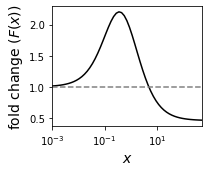

In [6]:
case="model=3_1_t=1f,2f_d=m_p"
print(case)
#diag q2 y_c: 2.7999999999999794 y_1: -2.824999999999827 ; [2.812455733275533, -2.8088024450829323]
parset_0_12860=[19.2401644,10000.0,1.0,2.46755503,19.7677685,33.4285856,0.010801431,100.0]
#[('kb', 19.2401644), ('k_1_0', 1.0), ('kr_1_0', 33.4285856), ('kb', 19.2401644), ('k_2_0', 2.46755503), ('kb', 19.2401644), ('k_3_0', 19.7677685), ('ku', 10000.0), ('k_1_1', 0.010801431), ('kr_1_1', 33.4285856), ('ku', 10000.0), ('k_2_1', 246.75550300000003), ('ku', 10000.0), ('k_3_1', 19.7677685)]

#diag q2 y_c: 2.8749999999999787 y_1: -2.899999999999828 ; [2.8750850966520805, -2.876389338107653]
parset_0_12840=[353.714871,1338.54568,1.0,1.0,7282.26067,13.4446071,0.01,100.0]
#[('kb', 353.714871), ('k_1_0', 1.0), ('kr_1_0', 13.4446071), ('kb', 353.714871), ('k_2_0', 1.0), ('kb', 353.714871), ('k_3_0', 7282.26067), ('ku', 1338.54568), ('k_1_1', 0.01), ('kr_1_1', 13.4446071), ('ku', 1338.54568), ('k_2_1', 100.0), ('ku', 1338.54568), ('k_3_1', 7282.26067)]

#diag q2 y_c: 1.1249999999999858 y_1: -1.1499999999998032 ; [1.1379743750346567, -1.1293873917484025]
parset_0_25399=[658.75556,201.356186,356.515235,36.0002564,338.957847,10.6706116,0.0391127664,94.6185087]
#[('kb', 658.75556), ('k_1_0', 356.515235), ('kr_1_0', 10.6706116), ('kb', 658.75556), ('k_2_0', 36.0002564), ('kb', 658.75556), ('k_3_0', 338.957847), ('ku', 201.356186), ('k_1_1', 13.944297104596105), ('kr_1_1', 10.6706116), ('ku', 201.356186), ('k_2_1', 3406.2905733856305), ('ku', 201.356186), ('k_3_1', 338.957847)]

#diag q2 y_c: 1.7749999999999826 y_1: -1.7999999999998124 ; [1.7774040889569116, -1.779062179920569]
parset_0_1258=[1.0,3752.04992,10000.0,370.597022,6066.00065,210.22183,0.01,41.1565235]
#[('kb', 1.0), ('k_1_0', 10000.0), ('kr_1_0', 210.22183), ('kb', 1.0), ('k_2_0', 370.597022), ('kb', 1.0), ('k_3_0', 6066.00065), ('ku', 3752.04992), ('k_1_1', 100.0), ('kr_1_1', 210.22183), ('ku', 3752.04992), ('k_2_1', 15252.485044973017), ('ku', 3752.04992), ('k_3_1', 6066.00065)]

#diag q2 y_c: 0.0249999999999892 y_1: -0.0499999999997875 ; [0.026820898815882562, -0.0485387196976303]
parset_0_6023=[3877.06841,1313.67829,2207.5686,68.2270447,1.15920362,599.44906,0.01,100.0]
#[('kb', 3877.06841), ('k_1_0', 2207.5686), ('kr_1_0', 599.44906), ('kb', 3877.06841), ('k_2_0', 68.2270447), ('kb', 3877.06841), ('k_3_0', 1.15920362), ('ku', 1313.67829), ('k_1_1', 22.075686), ('kr_1_1', 599.44906), ('ku', 1313.67829), ('k_2_1', 6822.70447), ('ku', 1313.67829), ('k_3_1', 1.15920362)]
for p_,parset in enumerate([parset_0_25399]):
    plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.001,xlim1=500)
    

model: 3_1 transitions: ['1r', '3f']
[('kb', 917.199729), ('k_1_0', 2855.19782), ('kr_1_0', 10000.0), ('kb', 917.199729), ('k_2_0', 46.455711), ('kb', 917.199729), ('k_3_0', 1.0), ('ku', 217.86426), ('k_1_1', 2855.19782), ('kr_1_1', 854770.5279999999), ('ku', 217.86426), ('k_2_1', 46.455711), ('ku', 217.86426), ('k_3_1', 17.8602753)]
$k_{1}$ = 2855.20, \epsilon_1 = 1.00, $k_{1_{r}}$ = 10000.00, \epsilon_{1_r} = 85.48, $k_{2}$ = 46.46, \epsilon_2 = 1.00, $k_{3}$ = 1.00, \epsilon_3 = 17.86, $k_b$ = 917.20, $k_u$ = 217.86, 

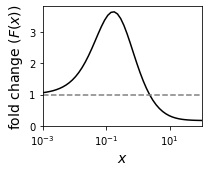

In [7]:
case="model=3_1_t=1r,3f_d=p_p"
#p n y_c: 0.374999999999988 y_1: -2.674999999999825 ; [0.37686861483818607, -2.6715979970618005]
parset_3_1492=[1.39519824,164.01868119,1.0,137.73148407,1.0,99.90412151,22.60276877,100.0]
#[('kb', 1.39519824), ('k_1_0', 1.0), ('kr_1_0', 99.90412151), ('kb', 1.39519824), ('k_2_0', 137.73148407), ('kb', 1.39519824), ('k_3_0', 1.0), ('ku', 164.01868119), ('k_1_1', 1.0), ('kr_1_1', 2258.1097576605134), ('ku', 164.01868119), ('k_2_1', 137.73148407), ('ku', 164.01868119), ('k_3_1', 100.0)]

#p n y_c: 1.024999999999986 y_1: -3.5749999999998376 ; [1.0400928840861692, -3.5583479696084748]
parset_3_22836=[103.38413391,61.02569874,13.21267268,20.97118542,1.06172985,38.95841864,100.0,30.86537766]
#[('kb', 103.38413391), ('k_1_0', 13.21267268), ('kr_1_0', 38.95841864), ('kb', 103.38413391), ('k_2_0', 20.97118542), ('kb', 103.38413391), ('k_3_0', 1.06172985), ('ku', 61.02569874), ('k_1_1', 13.21267268), ('kr_1_1', 3895.841864), ('ku', 61.02569874), ('k_2_1', 20.97118542), ('ku', 61.02569874), ('k_3_1', 32.77069279314515)]

#p n y_c: 1.799999999999983 y_1: -4.074999999999845 ; [1.8171185803103365, -4.0573806429387265]
parset_3_62241=[2.32875126,6029.49772,770.31967,63.9894466,1.0,10000.0,100.0,100.0]
#[('kb', 2.32875126), ('k_1_0', 770.31967), ('kr_1_0', 10000.0), ('kb', 2.32875126), ('k_2_0', 63.9894466), ('kb', 2.32875126), ('k_3_0', 1.0), ('ku', 6029.49772), ('k_1_1', 770.31967), ('kr_1_1', 1000000.0), ('ku', 6029.49772), ('k_2_1', 63.9894466), ('ku', 6029.49772), ('k_3_1', 100.0)]

#p n y_c: 0.949999999999986 y_1: -4.8999999999998565 ; [0.9730367501494169, -4.88491379249654]
parset_3_27995=[10000.0,99.8254267,18.7262106,352.801024,1.04195139,2807.83601,100.0,48.8319586]
#[('kb', 10000.0), ('k_1_0', 18.7262106), ('kr_1_0', 2807.83601), ('kb', 10000.0), ('k_2_0', 352.801024), ('kb', 10000.0), ('k_3_0', 1.04195139), ('ku', 99.8254267), ('k_1_1', 18.7262106), ('kr_1_1', 280783.601), ('ku', 99.8254267), ('k_2_1', 352.801024), ('ku', 99.8254267), ('k_3_1', 50.88052713969245)]

#p n y_c: 1.8499999999999828 y_1: -2.5749999999998234 ; [1.8536958997042154, -2.5707946926686716]
parset_3_12827=[917.199729,217.86426,2855.19782,46.455711,1.0,10000.0,85.4770528,17.8602753]
#[('kb', 917.199729), ('k_1_0', 2855.19782), ('kr_1_0', 10000.0), ('kb', 917.199729), ('k_2_0', 46.455711), ('kb', 917.199729), ('k_3_0', 1.0), ('ku', 217.86426), ('k_1_1', 2855.19782), ('kr_1_1', 854770.5279999999), ('ku', 217.86426), ('k_2_1', 46.455711), ('ku', 217.86426), ('k_3_1', 17.8602753)]

for p_,parset in enumerate([parset_3_12827]):
    plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.001,xlim1=100)
    

model: 3_12 transitions: ['1f', '3f']
[('kb', 10000.0), ('k_1_0', 1.0), ('kr_1_0', 14.5821449), ('kb', 10000.0), ('k_2_0', 1.0), ('kr_2_0', 858.585288), ('kb', 10000.0), ('k_3_0', 34.2352107), ('ku', 459.721374), ('k_1_1', 100.0), ('kr_1_1', 14.5821449), ('ku', 459.721374), ('k_2_1', 1.0), ('kr_2_1', 858.585288), ('ku', 459.721374), ('k_3_1', 0.342352107)]
$k_{1}$ = 1.00, \epsilon_1 = 100.00, $k_{1_{r}}$ = 14.58, \epsilon_{1_r} = 1.00, $k_{2}$ = 1.00, \epsilon_2 = 1.00, $k_{2_{r}}$ = 858.59, \epsilon_{2_r} = 1.00, $k_{3}$ = 34.24, \epsilon_3 = 0.01, $k_b$ = 10000.00, $k_u$ = 459.72, 

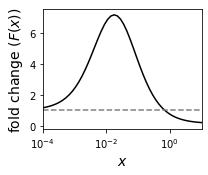

In [9]:
case="model=3_12_t=1f,3f_d=p_m"
#diag q2 y_c: 2.7999999999999794 y_1: -2.824999999999827 ; [2.821058269814336, -2.8197484497146337]
parset_13_33077=[10000.0,459.721374,1.0,1.0,34.2352107,14.5821449,858.585288,100.0,0.01]
#[('kb', 10000.0), ('k_1_0', 1.0), ('kr_1_0', 14.5821449), ('kb', 10000.0), ('k_2_0', 1.0), ('kr_2_0', 858.585288), ('kb', 10000.0), ('k_3_0', 34.2352107), ('ku', 459.721374), ('k_1_1', 100.0), ('kr_1_1', 14.5821449), ('ku', 459.721374), ('k_2_1', 1.0), ('kr_2_1', 858.585288), ('ku', 459.721374), ('k_3_1', 0.342352107)]

#diag q2 y_c: 2.82499999999998 y_1: -2.824999999999827 ; [2.834711385340416, -2.8057037389780852]
parset_13_28165=[1776.49311,1601.15379,6.51563099,4.14609311,1.0,115.574189,18.9113642,100.0,0.01]
#[('kb', 1776.49311), ('k_1_0', 6.51563099), ('kr_1_0', 115.574189), ('kb', 1776.49311), ('k_2_0', 4.14609311), ('kr_2_0', 18.9113642), ('kb', 1776.49311), ('k_3_0', 1.0), ('ku', 1601.15379), ('k_1_1', 651.563099), ('kr_1_1', 115.574189), ('ku', 1601.15379), ('k_2_1', 4.14609311), ('kr_2_1', 18.9113642), ('ku', 1601.15379), ('k_3_1', 0.01)]

#diag q2 y_c: 2.8749999999999787 y_1: -2.899999999999828 ; [2.883401049078939, -2.876174596054085]
parset_13_8401=[1.96525961,10000.0,1.0,10000.0,1.0,10000.0,12.3069597,100.0,0.01]
#[('kb', 1.96525961), ('k_1_0', 1.0), ('kr_1_0', 10000.0), ('kb', 1.96525961), ('k_2_0', 10000.0), ('kr_2_0', 12.3069597), ('kb', 1.96525961), ('k_3_0', 1.0), ('ku', 10000.0), ('k_1_1', 100.0), ('kr_1_1', 10000.0), ('ku', 10000.0), ('k_2_1', 10000.0), ('kr_2_1', 12.3069597), ('ku', 10000.0), ('k_3_1', 0.01)]

#diag q2 y_c: 0.0499999999999891 y_1: -0.0499999999997875 ; [0.0690346739658517, -0.02566928381928148]
parset_13_33997=[770.39272,65.8279193,165.37714,3933.85298,1.78811161,10000.0,11.9926957,100.0,0.805626827]
#[('kb', 770.39272), ('k_1_0', 165.37714), ('kr_1_0', 10000.0), ('kb', 770.39272), ('k_2_0', 3933.85298), ('kr_2_0', 11.9926957), ('kb', 770.39272), ('k_3_0', 1.78811161), ('ku', 65.8279193), ('k_1_1', 16537.714), ('kr_1_1', 10000.0), ('ku', 65.8279193), ('k_2_1', 3933.85298), ('kr_2_1', 11.9926957), ('ku', 65.8279193), ('k_3_1', 1.4405506826861616)]

#diag q2 y_c: 0.0249999999999892 y_1: -0.0499999999997875 ; [0.046824126516609034, -0.04469752403095093]
parset_13_12849=[1.15109931,10000.0,438.280475,24.4582122,10000.0,213.333525,5.56995163,1.16531935,0.0250196717]
#[('kb', 1.15109931), ('k_1_0', 438.280475), ('kr_1_0', 213.333525), ('kb', 1.15109931), ('k_2_0', 24.4582122), ('kr_2_0', 5.56995163), ('kb', 1.15109931), ('k_3_0', 10000.0), ('ku', 10000.0), ('k_1_1', 510.7367182446913), ('kr_1_1', 213.333525), ('ku', 10000.0), ('k_2_1', 24.4582122), ('kr_2_1', 5.56995163), ('ku', 10000.0), ('k_3_1', 250.19671699999998)]

for p_,parset in enumerate([parset_13_33077]):
    plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.0001,xlim1=10)


model: 5_1234 transitions: ['2f', '4f']
[('kb', 454.667189), ('k_1_0', 9165.57959), ('kr_1_0', 672.271502), ('kb', 454.667189), ('k_2_0', 1.0), ('kr_2_0', 4.44256692), ('kb', 454.667189), ('k_3_0', 559.598803), ('kr_3_0', 478.391192), ('kb', 454.667189), ('k_4_0', 3.16203911), ('kr_4_0', 7.18276891), ('kb', 454.667189), ('k_5_0', 2304.23201), ('ku', 280.117612), ('k_1_1', 9165.57959), ('kr_1_1', 672.271502), ('ku', 280.117612), ('k_2_1', 0.210328907), ('kr_2_1', 4.44256692), ('ku', 280.117612), ('k_3_1', 559.598803), ('kr_3_1', 478.391192), ('ku', 280.117612), ('k_4_1', 106.38124319674769), ('kr_4_1', 7.18276891), ('ku', 280.117612), ('k_5_1', 2304.23201)]
$k_{1}$ = 9165.58, \epsilon_1 = 1.00, $k_{1_{r}}$ = 672.27, \epsilon_{1_r} = 1.00, $k_{2}$ = 1.00, \epsilon_2 = 0.21, $k_{2_{r}}$ = 4.44, \epsilon_{2_r} = 1.00, $k_{3}$ = 559.60, \epsilon_3 = 1.00, $k_{3_{r}}$ = 478.39, \epsilon_{3_r} = 1.00, $k_{4}$ = 3.16, \epsilon_4 = 33.64, $k_{4_{r}}$ = 7.18, \epsilon_{4_r} = 1.00, $k_{5}$ = 230

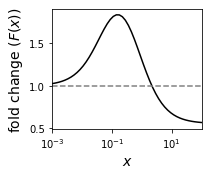

model: 5_1234 transitions: ['2f', '4f']
[('kb', 5.15910843), ('k_1_0', 1.0), ('kr_1_0', 554.301195), ('kb', 5.15910843), ('k_2_0', 10000.0), ('kr_2_0', 44.5154882), ('kb', 5.15910843), ('k_3_0', 1.13301566), ('kr_3_0', 279.753489), ('kb', 5.15910843), ('k_4_0', 3453.00384), ('kr_4_0', 255.261361), ('kb', 5.15910843), ('k_5_0', 1.0), ('ku', 100.967168), ('k_1_1', 1.0), ('kr_1_1', 554.301195), ('ku', 100.967168), ('k_2_1', 590.137615), ('kr_2_1', 44.5154882), ('ku', 100.967168), ('k_3_1', 1.13301566), ('kr_3_1', 279.753489), ('ku', 100.967168), ('k_4_1', 345300.38399999996), ('kr_4_1', 255.261361), ('ku', 100.967168), ('k_5_1', 1.0)]
$k_{1}$ = 1.00, \epsilon_1 = 1.00, $k_{1_{r}}$ = 554.30, \epsilon_{1_r} = 1.00, $k_{2}$ = 10000.00, \epsilon_2 = 0.06, $k_{2_{r}}$ = 44.52, \epsilon_{2_r} = 1.00, $k_{3}$ = 1.13, \epsilon_3 = 1.00, $k_{3_{r}}$ = 279.75, \epsilon_{3_r} = 1.00, $k_{4}$ = 3453.00, \epsilon_4 = 100.00, $k_{4_{r}}$ = 255.26, \epsilon_{4_r} = 1.00, $k_{5}$ = 1.00, \epsilon_5 = 1.0

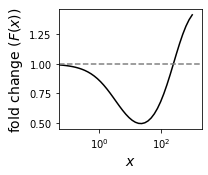

model: 5_1234 transitions: ['2f', '4f']
[('kb', 16.3135958), ('k_1_0', 1.0), ('kr_1_0', 103.812115), ('kb', 16.3135958), ('k_2_0', 10000.0), ('kr_2_0', 781.451602), ('kb', 16.3135958), ('k_3_0', 1.0), ('kr_3_0', 279.753489), ('kb', 16.3135958), ('k_4_0', 10000.0), ('kr_4_0', 482.750867), ('kb', 16.3135958), ('k_5_0', 1.0), ('ku', 26.0954618), ('k_1_1', 1.0), ('kr_1_1', 103.812115), ('ku', 26.0954618), ('k_2_1', 1234.82071), ('kr_2_1', 781.451602), ('ku', 26.0954618), ('k_3_1', 1.0), ('kr_3_1', 279.753489), ('ku', 26.0954618), ('k_4_1', 1000000.0), ('kr_4_1', 482.750867), ('ku', 26.0954618), ('k_5_1', 1.0)]
$k_{1}$ = 1.00, \epsilon_1 = 1.00, $k_{1_{r}}$ = 103.81, \epsilon_{1_r} = 1.00, $k_{2}$ = 10000.00, \epsilon_2 = 0.12, $k_{2_{r}}$ = 781.45, \epsilon_{2_r} = 1.00, $k_{3}$ = 1.00, \epsilon_3 = 1.00, $k_{3_{r}}$ = 279.75, \epsilon_{3_r} = 1.00, $k_{4}$ = 10000.00, \epsilon_4 = 100.00, $k_{4_{r}}$ = 482.75, \epsilon_{4_r} = 1.00, $k_{5}$ = 1.00, \epsilon_5 = 1.00, $k_b$ = 16.31, $k_u$ 

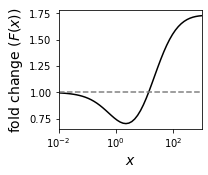

In [10]:
case="model=5_1234_t=2f,4f_d=m_p"

#diag q2 y_c: 0.8499999999999863 y_1: -0.8499999999997989 ; [0.8734522254896899, -0.8497662068476689]
parset_16_9270=[454.667189,280.117612,9165.57959,1.0,559.598803,3.16203911,2304.23201,672.271502,4.44256692,478.391192,7.18276891,0.210328907,33.6432408]
#[('kb', 454.667189), ('k_1_0', 9165.57959), ('kr_1_0', 672.271502), ('kb', 454.667189), ('k_2_0', 1.0), ('kr_2_0', 4.44256692), ('kb', 454.667189), ('k_3_0', 559.598803), ('kr_3_0', 478.391192), ('kb', 454.667189), ('k_4_0', 3.16203911), ('kr_4_0', 7.18276891), ('kb', 454.667189), ('k_5_0', 2304.23201), ('ku', 280.117612), ('k_1_1', 9165.57959), ('kr_1_1', 672.271502), ('ku', 280.117612), ('k_2_1', 0.210328907), ('kr_2_1', 4.44256692), ('ku', 280.117612), ('k_3_1', 559.598803), ('kr_3_1', 478.391192), ('ku', 280.117612), ('k_4_1', 106.38124319674769), ('kr_4_1', 7.18276891), ('ku', 280.117612), ('k_5_1', 2304.23201)]

#diag q2 y_c: 2.8749999999999787 y_1: -2.874999999999828 ; [2.8940860460383315, -2.861087281396903]
parset_16_22622=[1.0,10000.0,19.6061898,23.9162956,6.35642202,6.01839898,35.9822142,10000.0,13.0997529,1.0,4582.08866,0.01,100.0]
#[('kb', 1.0), ('k_1_0', 19.6061898), ('kr_1_0', 10000.0), ('kb', 1.0), ('k_2_0', 23.9162956), ('kr_2_0', 13.0997529), ('kb', 1.0), ('k_3_0', 6.35642202), ('kr_3_0', 1.0), ('kb', 1.0), ('k_4_0', 6.01839898), ('kr_4_0', 4582.08866), ('kb', 1.0), ('k_5_0', 35.9822142), ('ku', 10000.0), ('k_1_1', 19.6061898), ('kr_1_1', 10000.0), ('ku', 10000.0), ('k_2_1', 0.239162956), ('kr_2_1', 13.0997529), ('ku', 10000.0), ('k_3_1', 6.35642202), ('kr_3_1', 1.0), ('ku', 10000.0), ('k_4_1', 601.839898), ('kr_4_1', 4582.08866), ('ku', 10000.0), ('k_5_1', 35.9822142)]

#diag q2 y_c: 2.8749999999999787 y_1: -2.899999999999828 ; [2.8892933089432367, -2.8853511696374583]
parset_16_18211=[2644.14429,10000.0,1.0,1.0,1.4053672,3.82372419,10000.0,10000.0,127.170846,52.2435199,721.760329,0.01,100.0]
#[('kb', 2644.14429), ('k_1_0', 1.0), ('kr_1_0', 10000.0), ('kb', 2644.14429), ('k_2_0', 1.0), ('kr_2_0', 127.170846), ('kb', 2644.14429), ('k_3_0', 1.4053672), ('kr_3_0', 52.2435199), ('kb', 2644.14429), ('k_4_0', 3.82372419), ('kr_4_0', 721.760329), ('kb', 2644.14429), ('k_5_0', 10000.0), ('ku', 10000.0), ('k_1_1', 1.0), ('kr_1_1', 10000.0), ('ku', 10000.0), ('k_2_1', 0.01), ('kr_2_1', 127.170846), ('ku', 10000.0), ('k_3_1', 1.4053672), ('kr_3_1', 52.2435199), ('ku', 10000.0), ('k_4_1', 382.37241900000004), ('kr_4_1', 721.760329), ('ku', 10000.0), ('k_5_1', 10000.0)]

#diag q2 y_c: 2.899999999999979 y_1: -2.899999999999828 ; [2.900759503565623, -2.8761147798938866]
parset_16_13941=[8939.90902,10000.0,28.0459181,1.0,928.726044,1.44955157,1.0,10000.0,1.0,1.0,4912.63041,0.01,100.0]
#[('kb', 8939.90902), ('k_1_0', 28.0459181), ('kr_1_0', 10000.0), ('kb', 8939.90902), ('k_2_0', 1.0), ('kr_2_0', 1.0), ('kb', 8939.90902), ('k_3_0', 928.726044), ('kr_3_0', 1.0), ('kb', 8939.90902), ('k_4_0', 1.44955157), ('kr_4_0', 4912.63041), ('kb', 8939.90902), ('k_5_0', 1.0), ('ku', 10000.0), ('k_1_1', 28.0459181), ('kr_1_1', 10000.0), ('ku', 10000.0), ('k_2_1', 0.01), ('kr_2_1', 1.0), ('ku', 10000.0), ('k_3_1', 928.726044), ('kr_3_1', 1.0), ('ku', 10000.0), ('k_4_1', 144.95515699999999), ('kr_4_1', 4912.63041), ('ku', 10000.0), ('k_5_1', 1.0)]

#diag q2 y_c: 2.8749999999999787 y_1: -2.874999999999828 ; [2.8940860460383315, -2.861087281396903]
parset_16_1148=[1.0,10000.0,19.6061898,23.9162956,6.35642202,6.01839898,35.9822142,10000.0,13.0997529,1.0,4582.08866,0.01,100.0]
#[('kb', 1.0), ('k_1_0', 19.6061898), ('kr_1_0', 10000.0), ('kb', 1.0), ('k_2_0', 23.9162956), ('kr_2_0', 13.0997529), ('kb', 1.0), ('k_3_0', 6.35642202), ('kr_3_0', 1.0), ('kb', 1.0), ('k_4_0', 6.01839898), ('kr_4_0', 4582.08866), ('kb', 1.0), ('k_5_0', 35.9822142), ('ku', 10000.0), ('k_1_1', 19.6061898), ('kr_1_1', 10000.0), ('ku', 10000.0), ('k_2_1', 0.239162956), ('kr_2_1', 13.0997529), ('ku', 10000.0), ('k_3_1', 6.35642202), ('kr_3_1', 1.0), ('ku', 10000.0), ('k_4_1', 601.839898), ('kr_4_1', 4582.08866), ('ku', 10000.0), ('k_5_1', 35.9822142)]


#n p y_c: -0.17500000000001 y_1: 1.525000000000233 ; [-0.1535132277605295, 1.5443985905484026]
parset_16_4642=[7.9916063,22.0438445,1.0,10000.0,1.0,10000.0,1.0,51.3026192,1175.046,598.524852,275.562042,0.176728104,100.0]
#[('kb', 7.9916063), ('k_1_0', 1.0), ('kr_1_0', 51.3026192), ('kb', 7.9916063), ('k_2_0', 10000.0), ('kr_2_0', 1175.046), ('kb', 7.9916063), ('k_3_0', 1.0), ('kr_3_0', 598.524852), ('kb', 7.9916063), ('k_4_0', 10000.0), ('kr_4_0', 275.562042), ('kb', 7.9916063), ('k_5_0', 1.0), ('ku', 22.0438445), ('k_1_1', 1.0), ('kr_1_1', 51.3026192), ('ku', 22.0438445), ('k_2_1', 1767.28104), ('kr_2_1', 1175.046), ('ku', 22.0438445), ('k_3_1', 1.0), ('kr_3_1', 598.524852), ('ku', 22.0438445), ('k_4_1', 1000000.0), ('kr_4_1', 275.562042), ('ku', 22.0438445), ('k_5_1', 1.0)]

#n p y_c: -1.025000000000007 y_1: 0.5000000000002203 ; [-1.0061073607809679, 0.5000157815980435]
parset_16_25274=[5.15910843,100.967168,1.0,10000.0,1.13301566,3453.00384,1.0,554.301195,44.5154882,279.753489,255.261361,0.0590137615,100.0]
#[('kb', 5.15910843), ('k_1_0', 1.0), ('kr_1_0', 554.301195), ('kb', 5.15910843), ('k_2_0', 10000.0), ('kr_2_0', 44.5154882), ('kb', 5.15910843), ('k_3_0', 1.13301566), ('kr_3_0', 279.753489), ('kb', 5.15910843), ('k_4_0', 3453.00384), ('kr_4_0', 255.261361), ('kb', 5.15910843), ('k_5_0', 1.0), ('ku', 100.967168), ('k_1_1', 1.0), ('kr_1_1', 554.301195), ('ku', 100.967168), ('k_2_1', 590.137615), ('kr_2_1', 44.5154882), ('ku', 100.967168), ('k_3_1', 1.13301566), ('kr_3_1', 279.753489), ('ku', 100.967168), ('k_4_1', 345300.38399999996), ('kr_4_1', 255.261361), ('ku', 100.967168), ('k_5_1', 1.0)]

#n p y_c: -0.5250000000000088 y_1: 0.7750000000002242 ; [-0.5100424311475626, 0.7890738860800437]
parset_16_25526=[16.3135958,26.0954618,1.0,10000.0,1.0,10000.0,1.0,103.812115,781.451602,279.753489,482.750867,0.123482071,100.0]
#[('kb', 16.3135958), ('k_1_0', 1.0), ('kr_1_0', 103.812115), ('kb', 16.3135958), ('k_2_0', 10000.0), ('kr_2_0', 781.451602), ('kb', 16.3135958), ('k_3_0', 1.0), ('kr_3_0', 279.753489), ('kb', 16.3135958), ('k_4_0', 10000.0), ('kr_4_0', 482.750867), ('kb', 16.3135958), ('k_5_0', 1.0), ('ku', 26.0954618), ('k_1_1', 1.0), ('kr_1_1', 103.812115), ('ku', 26.0954618), ('k_2_1', 1234.82071), ('kr_2_1', 781.451602), ('ku', 26.0954618), ('k_3_1', 1.0), ('kr_3_1', 279.753489), ('ku', 26.0954618), ('k_4_1', 1000000.0), ('kr_4_1', 482.750867), ('ku', 26.0954618), ('k_5_1', 1.0)]

#n p y_c: -0.2250000000000098 y_1: 1.575000000000237 ; [-0.21207208926609017, 1.578840569240294]
parset_16_15785=[3.75554663,30.0599648,1.0,10000.0,17.5345126,10000.0,1.00184357,49.2260011,1416.08821,2618.43993,163.498506,0.108098802,100.0]
#[('kb', 3.75554663), ('k_1_0', 1.0), ('kr_1_0', 49.2260011), ('kb', 3.75554663), ('k_2_0', 10000.0), ('kr_2_0', 1416.08821), ('kb', 3.75554663), ('k_3_0', 17.5345126), ('kr_3_0', 2618.43993), ('kb', 3.75554663), ('k_4_0', 10000.0), ('kr_4_0', 163.498506), ('kb', 3.75554663), ('k_5_0', 1.00184357), ('ku', 30.0599648), ('k_1_1', 1.0), ('kr_1_1', 49.2260011), ('ku', 30.0599648), ('k_2_1', 1080.98802), ('kr_2_1', 1416.08821), ('ku', 30.0599648), ('k_3_1', 17.5345126), ('kr_3_1', 2618.43993), ('ku', 30.0599648), ('k_4_1', 1000000.0), ('kr_4_1', 163.498506), ('ku', 30.0599648), ('k_5_1', 1.00184357)]

#n p y_c: -0.0500000000000104 y_1: 1.7750000000002402 ; [-0.047749865278048725, 1.7794364435456138]
parset_16_4827=[7.4854207,14.5762998,1.0,10000.0,3.69801284,10000.0,1.14789819,27.7576697,1093.79145,929.329369,430.467205,0.114329902,100.0]
#[('kb', 7.4854207), ('k_1_0', 1.0), ('kr_1_0', 27.7576697), ('kb', 7.4854207), ('k_2_0', 10000.0), ('kr_2_0', 1093.79145), ('kb', 7.4854207), ('k_3_0', 3.69801284), ('kr_3_0', 929.329369), ('kb', 7.4854207), ('k_4_0', 10000.0), ('kr_4_0', 430.467205), ('kb', 7.4854207), ('k_5_0', 1.14789819), ('ku', 14.5762998), ('k_1_1', 1.0), ('kr_1_1', 27.7576697), ('ku', 14.5762998), ('k_2_1', 1143.29902), ('kr_2_1', 1093.79145), ('ku', 14.5762998), ('k_3_1', 3.69801284), ('kr_3_1', 929.329369), ('ku', 14.5762998), ('k_4_1', 1000000.0), ('kr_4_1', 430.467205), ('ku', 14.5762998), ('k_5_1', 1.14789819)]
p_=0
parset=parset_16_9270
plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.001,xlim1=100)

p_=1
parset=parset_16_25274
plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.05,xlim1=2000)

p_=2
parset=parset_16_25526
plot_parset(case,parset,figname="./figscode/othercyclemodels/%s_%d.pdf"%(case,p_),xlim0=0.01,xlim1=1000)

